!pip3 install pandas<br>
!pip3 install numpy<br>
!pip3 install matplotlib<br>
!pip3 install statsmodels<br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

연속형 임의의 데이터 생성

In [2]:
np.random.seed(0)

Temperature = np.random.normal(30,3,100)
IceAmericano = Temperature + np.random.normal(100,8,100)
InteriorPrice = np.random.normal(25,2,100)

데이터 프레임 형태로 3개 데이터 합치기<br>

In [3]:
Data = pd.DataFrame({
    'Temp':Temperature,
    'Sales':IceAmericano,
    'InteriorPrice':InteriorPrice
})

Scatter plot으로 데이터 시각화 해보기

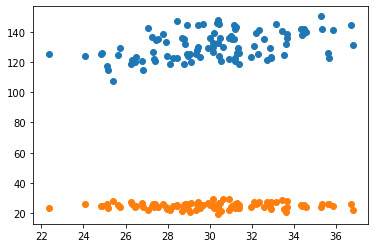

In [4]:
plt.plot(Data['Temp'], Data['Sales'], 'o')
plt.plot(Data['Temp'], Data['InteriorPrice'], 'o')
plt.show()

# 통계 기반 선형모델 학습 시작

선형 regression을 위해, y절편에 해당하는 constant (상수) 추가

In [5]:
import statsmodels.api as sm

InputFeature = Data[ ['Temp', 'InteriorPrice'] ]
InputFeature = sm.add_constant(InputFeature)

print(InputFeature.head())

   const       Temp  InteriorPrice
0    1.0  35.292157      24.261636
1    1.0  31.200472      24.521242
2    1.0  32.936214      27.199319
3    1.0  36.722680      26.310527
4    1.0  35.602674      26.280263


C:\Users\autot\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Linear regression 모델 학습

In [6]:
model = sm.OLS(
    Data['Sales'],
    InputFeature
)

model = model.fit()
print(model.params)

const            86.554744
Temp              1.295901
InteriorPrice     0.207835
dtype: float64


# 모델 해석

In [7]:
print( model.summary() )

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.172
Method:                 Least Squares   F-statistic:                     11.31
Date:                Wed, 20 Apr 2022   Prob (F-statistic):           3.84e-05
Time:                        09:49:31   Log-Likelihood:                -352.50
No. Observations:                 100   AIC:                             711.0
Df Residuals:                      97   BIC:                             718.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            86.5547     13.269      6.523

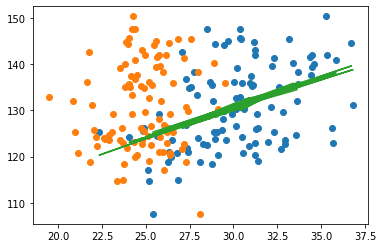

In [12]:
plt.plot(Data['Temp'], Data['Sales'], 'o')
plt.plot(Data['InteriorPrice'], Data['Sales'], 'o')
plt.plot(Data['Temp'], model.predict(InputFeature))
plt.show()

Linear model을 만든다 = 해석하고자하는 모델을 만든다(Prediction을 잘할 것이라 생각하면 안됨)<br>
전체를 가지고 모델을 만든다 = X전체가 들어왔을때 Y를 예측<br>
-> 이결과가 진짜로 해석이 적절하냐?<br>

유의했던 변수만 남겨놓고 새롭게 모델을 만드는 경우<br>
-> 더 좋은 모델을 만들고자 하는 것이 아니라,(이건 아닐 수 있지만)<br>
-> 해석에 방해되는 변수를 제외하고 해석을 위하여 유의한 변수만 쓴 것. (해석을 위해서는 이렇게 하기도 함)